In [1]:
import tensorflow as tf

In [2]:
import tensorflow as tf, time

@tf.function
def fast_multiply(a, b):
    return a * b

def multiply(a, b):
    return a * b

x = tf.random.normal([1000, 1000])
y = tf.random.normal([1000, 1000])

# Warm-up run for tf.function (to build the graph)
fast_multiply(x, y)

# Measure eager time
start = time.time()
for _ in range(1000):
    multiply(x, y)
print("Eager time:", time.time() - start)

# Measure tf.function time (graph is already built)
start = time.time()
for _ in range(1000):
    fast_multiply(x, y)
print("tf.function time:", time.time() - start)


Eager time: 0.2071061134338379
tf.function time: 0.29059481620788574


## 🛠 Practice Exercises

1. Create a **scalar, vector, matrix, and higher-rank tensor** using `tf.constant()` with values you choose.

2. For each tensor from step 1, print its **shape, rank (number of dimensions), and total elements**.

3. Generate two tensors filled with **random numbers between 0 and 1**, each of shape `[5, 200]`.

4. Perform a **matrix multiplication** of the tensors from step 3.

5. Perform an **element-wise dot product** of the tensors from step 3.

6. Create a tensor of random numbers between 0 and 1 with shape `[128, 128, 3]` (think of it like a random image).

7. Find the **smallest and largest values** inside the tensor from step 6.

8. Create a tensor of random values with shape `[1, 128, 128, 3]` and then use `tf.squeeze()` to reduce its shape to `[128, 128, 3]`.

9. Make a tensor of shape `[15]` with numbers of your choice, and find the **position (index)** of the maximum value.

10. One-hot encode the tensor you created in step 9 with a suitable `depth`.


In [3]:
import numpy as np
data = np.arange(0,1000 , 0.02)
c = tf.constant(data)
c.shape , tf.rank(c) , tf.size(c)

(TensorShape([50000]),
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=50000>)

In [4]:
x = tf.random.normal([5 , 200])
y = tf.random.normal([5 , 200])
print(f"{x.shape=} , {y.shape=}")
print(f"{tf.matmul(x , tf.transpose(y))}")
print(f"Element wise dot product shape: {tf.multiply(x ,y).shape}")

x.shape=TensorShape([5, 200]) , y.shape=TensorShape([5, 200])
[[  2.5824165   2.528718  -12.4303055   8.382345    6.8753977]
 [ 11.750107   12.658492   16.930956   16.619007    5.435748 ]
 [ -5.722952    0.7646389  -4.058028    1.3570497  10.962703 ]
 [ -4.710025   -9.660144    1.8901095   3.1254582  -5.53963  ]
 [  2.5301683  -4.614524   -9.162964  -15.500127   14.637358 ]]
Element wise dot product shape: (5, 200)


In [5]:
image = tf.random.normal([128 , 128 , 3])
print(f"smallest: {tf.reduce_min(image)} , largest: {tf.reduce_max(image)}")

smallest: -4.356212139129639 , largest: 3.9766178131103516


In [6]:
bimage = tf.random.normal([1 , 128 , 128 , 3])
tf.squeeze(bimage).shape

TensorShape([128, 128, 3])

In [7]:
t15 = tf.Variable(np.random.randint(1 , 20 , size = (15)))
t15

<tf.Variable 'Variable:0' shape=(15,) dtype=int64, numpy=array([10, 13, 12,  7, 11,  7, 12, 10,  3,  9, 18,  8, 17, 13, 15])>

In [8]:
tf.argmax(t15) , tf.argmin(t15)
tf.one_hot(t15.numpy() , depth = tf.cast(tf.reduce_max(t15) , tf.int32)).shape

TensorShape([15, 18])

In [9]:
x = tf.constant([[[5,10,15]]])  # shape (1,1,3)
x = tf.squeeze(x)
x.shape

TensorShape([3])

In [10]:
x = tf.constant([[1,2],[3,4]], dtype=tf.float32)
y = tf.nn.softmax(x, axis=1)
print(y.numpy())

[[0.26894143 0.7310586 ]
 [0.26894143 0.7310586 ]]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('deep'))

In [12]:
df = pd.read_csv('../data/ai_human_content_detection_dataset.csv')
df.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


DATASET EXPLORATION

Dataset shape: (1367, 17)

Columns: ['text_content', 'content_type', 'word_count', 'character_count', 'sentence_count', 'lexical_diversity', 'avg_sentence_length', 'avg_word_length', 'punctuation_ratio', 'flesch_reading_ease', 'gunning_fog_index', 'grammar_errors', 'passive_voice_ratio', 'predictability_score', 'burstiness', 'sentiment_score', 'label']

First 3 samples:
                                        text_content  label
0  Score each cause. Quality throughout beautiful...      1
1  Board its rock. Job worker break tonight coupl...      1
2  Way debate decision produce. Dream necessary c...      1

Label distribution:
label
0    684
1    683
Name: count, dtype: int64


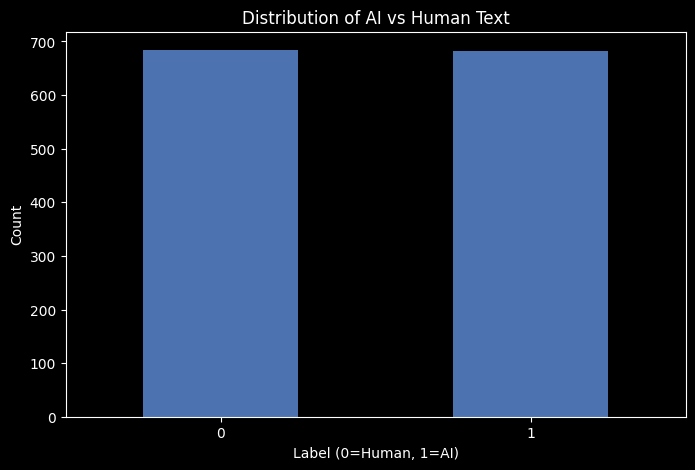

In [13]:
print("="*80)
print("DATASET EXPLORATION")
print("="*80)

print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

print("\nFirst 3 samples:")
print(df[['text_content', 'label']].head(3))

print("\nLabel distribution:")
print(df['label'].value_counts())

# Visualize label distribution
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of AI vs Human Text')
plt.xlabel('Label (0=Human, 1=AI)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder

texts = df['text_content'].values
labels = df['label'].values

if labels.dtype == 'object':
    le = LabelEncoder()
    labels = le.fit_transform(labels)

xtrain , xtest , ytrain , ytest = train_test_split(texts , labels , test_size= 0.2 , stratify= labels , random_state=42)

print(f"Total samples: {len(labels)}")
print(f"\nTraining samples: {len(xtrain)}")
print(f"Testing samples: {len(xtest)}")

Total samples: 1367

Training samples: 1093
Testing samples: 274


In [15]:
#tokenize texts:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


MAX_WORDS = 10000  # Maximum number of words to keep
MAX_LENGTH = 200 

tokenizer = Tokenizer(num_words= MAX_WORDS , oov_token = '<OOV>')
tokenizer.fit_on_texts(xtrain)

etext = xtrain[0][:100]
etoken = tokenizer.texts_to_sequences([etext])[0]
print(f"{len(etext.split())} , {len(etoken)}")

15 , 15


## 🎯 Summary of functions

- **Tokenizer** → Builds dictionary of words.
- **texts_to_sequences** → Turns text into lists of numbers.
- **pad_sequences** → Makes all sequences the same length (with zeros or truncation).
- **oov_token** → Marks unknown words.
- **padding='post'** → add zeros at the end.
- **truncating='post'** → cut off extra words at the end.


In [16]:
xtraintokens = tokenizer.texts_to_sequences(xtrain)
xtrainpad = pad_sequences(xtraintokens , maxlen= MAX_LENGTH , padding= 'post' , truncating= 'post')
len(xtraintokens) , xtrainpad.shape

(1093, (1093, 200))

In [17]:
xtesttokens = tokenizer.texts_to_sequences(xtest)
xtestpad = pad_sequences(xtesttokens , maxlen = MAX_LENGTH , padding = 'post' , truncating = 'post')
len(xtesttokens) , xtestpad.shape

(274, (274, 200))

In [18]:
print(f"vocabulary size: {len(tokenizer.word_index)}")

vocabulary size: 972


In [36]:
# create basic model with tensorflow:
from tensorflow.keras import models , layers , callbacks
def create_basic_model():
    model = models.Sequential([
        layers.Embedding(input_dim = MAX_WORDS , output_dim = 128 , input_length = MAX_LENGTH),
        # layers.GlobalAveragePooling1D(),
        layers.Flatten(),
        layers.Dense(64 , activation = 'relu'),
        layers.Dense(1 , activation = 'sigmoid')
    ])

    model.build(input_shape = (None , MAX_LENGTH))
    return model

basicModel = create_basic_model()
basicModel.compile(optimizer='adam', loss= 'binary_crossentropy' , metrics=['accuracy'])

basicModel.summary()

/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,918,529 (11.13 MB)

 Trainable params: 2,918,529 (11.13 MB)

 Non-trainable params: 0 (0.00 B)

Training Model:
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4807 - loss: 0.7093 - val_accuracy: 0.4795 - val_loss: 0.6951
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8905 - loss: 0.5345 - val_accuracy: 0.5160 - val_loss: 0.7217
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9432 - loss: 0.1692 - val_accuracy: 0.5160 - val_loss: 0.7509
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9957 - loss: 0.0534 - val_accuracy: 0.5023 - val_loss: 0.8033
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 0.4977 - val_loss: 0.8134
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.4932 - val_loss: 0.8375
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.4840 - val_loss: 0.8495
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.

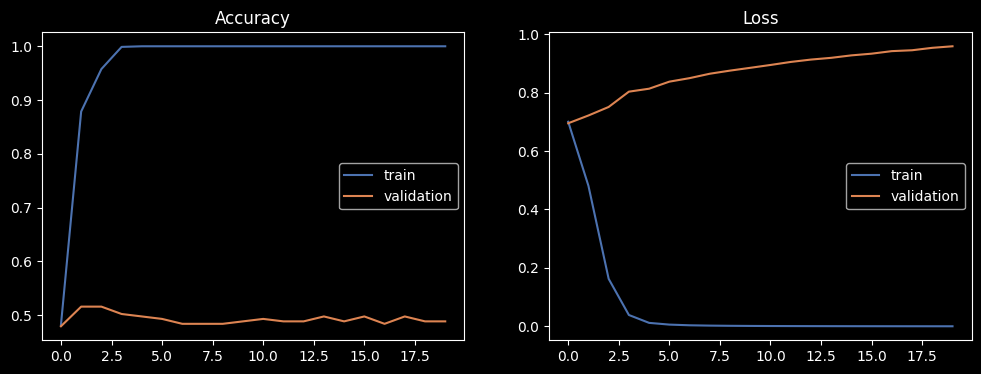

In [37]:
from sklearn.metrics import accuracy_score
print(f"Training Model:")
basic_history = basicModel.fit(xtrainpad , ytrain , batch_size= 32 , epochs = 20 , validation_split= 0.2 , verbose = 1)


basicPredictions = (basicModel.predict(xtestpad) > 0.5).astype(int).flatten()
basicaccuracy = accuracy_score(basicPredictions , ytest)
print(f"Basic model accuracy: {basicaccuracy}")

#plot model preformance:
plt.figure(figsize = (12 , 4))
plt.subplot(1 , 2, 1)
plt.plot(basic_history.history['accuracy'] , label = 'train')
plt.plot(basic_history.history['val_accuracy'] , label = 'validation')
plt.title('Accuracy')
plt.legend()


plt.subplot(1 , 2, 2)
plt.plot(basic_history.history['loss'] , label = 'train')
plt.plot(basic_history.history['val_loss'] , label = 'validation')
plt.title('Loss')
plt.legend()
plt.show()

In [21]:
# create a batch normalized model:

def create_batchNorm_model():
    model = models.Sequential([
        layers.Embedding(input_dim= MAX_WORDS , output_dim= 128 , input_length = MAX_LENGTH),
        layers.GlobalAveragePooling1D(),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(1 , activation = 'sigmoid')
    ])

    model.build(input_shape = (None , MAX_LENGTH))
    return model


bnmodel = create_batchNorm_model()
bnmodel.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
bnmodel.summary()


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,305,601 (4.98 MB)

 Trainable params: 1,305,217 (4.98 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8064 - loss: 0.3853 - val_accuracy: 0.4932 - val_loss: 0.6980
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8667 - loss: 0.3059 - val_accuracy: 0.4977 - val_loss: 0.7124
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8440 - loss: 0.3235 - val_accuracy: 0.5023 - val_loss: 0.7135
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8839 - loss: 0.2826 - val_accuracy: 0.4886 - val_loss: 0.7394
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8583 - loss: 0.2944 - val_accuracy: 0.5114 - val_loss: 0.8050
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8916 - loss: 0.2541 - val_accuracy: 0.5297 - val_loss: 0.8418
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9217 - loss: 0.2118 - val_accuracy: 0.5160 - val_loss: 0.8196
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9359 - loss: 0.1770 - val_accuracy: 0.5068 - val_loss:

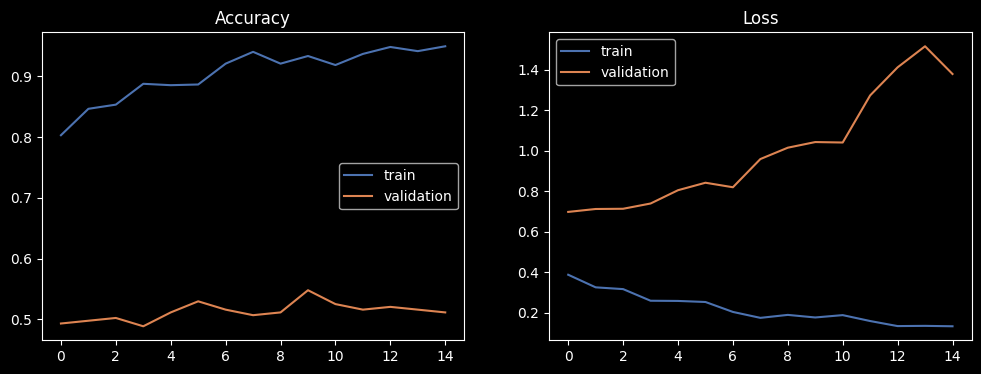

In [28]:
#train the model and print accuracy:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
bnhist = bnmodel.fit(xtrainpad , ytrain , batch_size=32 , epochs = 15 , verbose = 1 , validation_split= 0.2)

plt.figure(figsize = (12 , 4))
plt.subplot(1 , 2, 1)
plt.plot(bnhist.history['accuracy'] , label = 'train')
plt.plot(bnhist.history['val_accuracy'] , label = 'validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(1 , 2, 2)
plt.plot(bnhist.history['loss'] , label = 'train')
plt.plot(bnhist.history['val_loss'], label = 'validation')
plt.title('Loss')
plt.legend()
plt.show()

In [34]:
predictions = (bnmodel.predict(xtestpad) > 0.5).astype(int).flatten()
bnaccuracy = accuracy_score(predictions, ytest)
print(f'BN model accuracy:{bnaccuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
BN model accuracy:0.5218978102189781


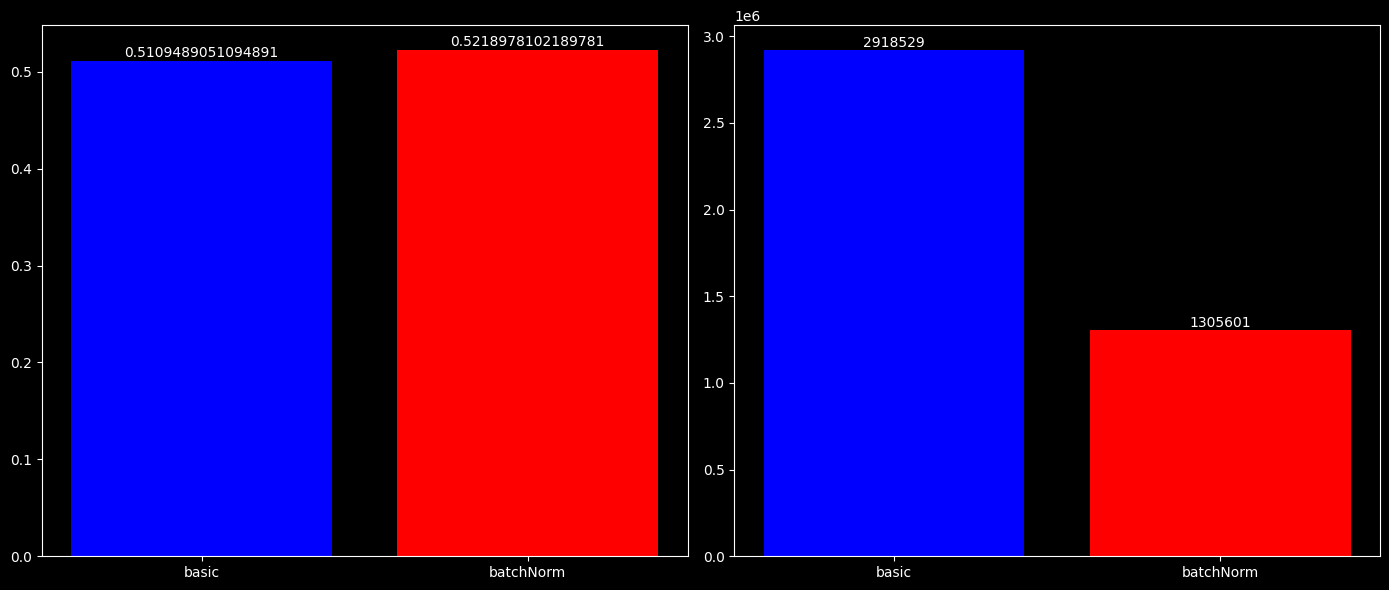

In [47]:
pdf = pd.DataFrame({
    "Model":['basic' , 'batchNorm'],
    "Accuracy": [basicaccuracy , bnaccuracy],
    "Parameters": [basicModel.count_params() , bnmodel.count_params()]
})

fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize = (14 , 6))

bars1 = ax1.bar(pdf['Model'] , pdf['Accuracy'] , color = ['blue' , 'red'])
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2 , height + 0.001 , f"{height}" , ha = 'center' , va = 'bottom')

bars = ax2.bar(pdf['Model'] , pdf['Parameters'] , color = ['blue' , 'red'])
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2 , height + 0.01 , f"{height}" , ha = 'center' , va = 'bottom')

plt.tight_layout()
plt.show()